Design and develop a model using autoencoders to regenerate digits using mnist dataset.

In [1]:
# Import necessary libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

Libraries for deep learning (TensorFlow/Keras) and visualization (Matplotlib) are imported successfully.

In [2]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


MNIST dataset is loaded successfully, with training and test images stored separately.

In [3]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape images to vectors of size 784 (28x28)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (60000, 784)
Test data shape: (10000, 784)


Pixel values are normalized between 0 and 1, and images are reshaped into 784-dimensional vectors.

In [4]:
# Cell 3: Define the autoencoder model
input_size = 784  # 28x28 pixels
code_size = 32    # Size of the encoded representation

# Encoder
input_img = layers.Input(shape=(input_size,))
hidden_1 = layers.Dense(128, activation='relu')(input_img)
hidden_2 = layers.Dense(64, activation='relu')(hidden_1)
code = layers.Dense(code_size, activation='relu')(hidden_2)

# Decoder
hidden_3 = layers.Dense(64, activation='relu')(code)
hidden_4 = layers.Dense(128, activation='relu')(hidden_3)
output_img = layers.Dense(input_size, activation='sigmoid')(hidden_4)

# Autoencoder model
autoencoder = Model(input_img, output_img)

# Compile
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Model summary
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

The autoencoder model is successfully built and summarized, confirming the correct layer architecture.



In [5]:
# Train the model
history = autoencoder.fit(x_train, x_train,
                         epochs=50,
                         batch_size=256,
                         shuffle=True,
                         validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 0.3373 - val_loss: 0.1656
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.1569 - val_loss: 0.1336
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1320 - val_loss: 0.1236
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1232 - val_loss: 0.1165
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.1162 - val_loss: 0.1113
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1118 - val_loss: 0.1083
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1091 - val_loss: 0.1073
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.1071 - val_loss: 0.1043
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1051 - val_loss: 0.1025
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.1033 - val_loss: 0.1011
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.1018 - val_loss: 0.0995
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

The model trains over 50 epochs, and loss values are computed for training and validation data.



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


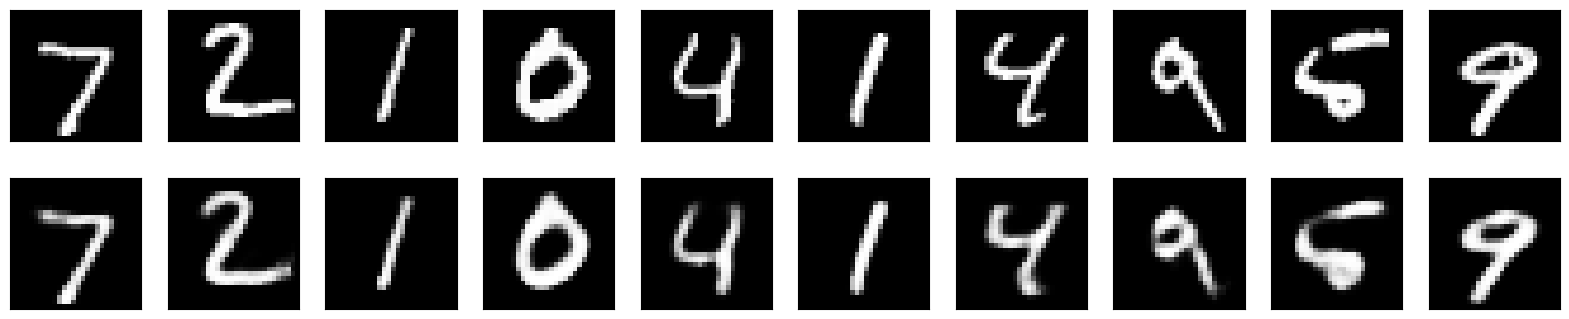

In [6]:
# Encode and decode some digits from the test set
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

The model successfully reconstructs images from the test set, showing similarities with original images.



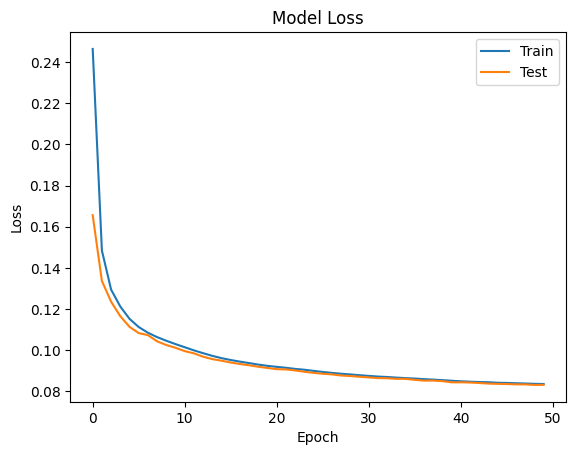

In [7]:
#Plot training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

The loss curves indicate how well the model has learned, with decreasing loss suggesting convergence.

Loss Curve Meaning:

The loss curve shows how the error (difference between the original and reconstructed images) changes during training.

It is plotted for both training loss (on training data) and validation loss (on unseen test data).

Decreasing Loss:

If the loss is reducing over time, it means the autoencoder is learning to reconstruct images better by minimizing reconstruction errors.

A steady decrease means the model is improving with more training epochs.

Convergence:

If the loss stabilizes at a low value, the model has converged, meaning it has learned as much as possible from the given data.

If the loss stops decreasing or fluctuates, further training might not improve the performance.

Ideal vs. Overfitting Case:
Ideal case: Training loss and validation loss both decrease and become stable.

Overfitting case: Training loss decreases, but validation loss increases (model memorizes training data but fails on new data).